# Semana 3: Estadística Descriptiva

## Ciencia de Datos en el Deporte - Fundamentos con Python

---

**Objetivos de aprendizaje:**
- Comprender los conceptos fundamentales de estadística descriptiva
- Calcular medidas de tendencia central (media, mediana, moda)
- Calcular medidas de dispersión (desviación estándar, varianza, rango)
- Aplicar estadística descriptiva a datos futbolísticos
- Crear histogramas y visualizaciones estadísticas
- Interpretar resultados estadísticos en el contexto del fútbol

---

## 1. Teoría: Fundamentos de Estadística Descriptiva

### ¿Qué es la Estadística Descriptiva?

La estadística descriptiva es la rama de la estadística que se encarga de **resumir, organizar y presentar datos** de manera comprensible. Su objetivo principal es describir las características principales de un conjunto de datos sin hacer inferencias sobre una población más amplia.

### Importancia en el Análisis Deportivo

En el contexto del fútbol, la estadística descriptiva nos permite:
- **Resumir el rendimiento**: Obtener una visión general del desempeño de equipos y jugadores
- **Identificar patrones**: Detectar tendencias en goles, resultados, etc.
- **Comparar**: Establecer comparaciones objetivas entre equipos, ligas o temporadas
- **Comunicar hallazgos**: Presentar información de manera clara y comprensible

### Tipos de Medidas Estadísticas

#### 1.1 **Medidas de Tendencia Central**
Nos indican el "centro" o valor típico de los datos:

- **Media (promedio)**: Suma de todos los valores dividida por el número de observaciones
  - *Ejemplo*: Promedio de goles por partido
  - *Fórmula*: x̄ = Σx / n

- **Mediana**: Valor que divide los datos ordenados por la mitad
  - *Ejemplo*: Mediana de goles por equipo en una temporada
  - *Ventaja*: Menos sensible a valores extremos

- **Moda**: Valor que aparece con mayor frecuencia
  - *Ejemplo*: Resultado más común (1-0, 2-1, etc.)
  - *Aplicación*: Identificar patrones frecuentes

#### 1.2 **Medidas de Dispersión**
Nos indican qué tan esparcidos están los datos:

- **Rango**: Diferencia entre el valor máximo y mínimo
  - *Ejemplo*: Diferencia entre el máximo y mínimo de goles por partido
  - *Fórmula*: Rango = Máximo - Mínimo

- **Varianza**: Promedio de las desviaciones al cuadrado respecto a la media
  - *Fórmula*: σ² = Σ(x - x̄)² / n
  - *Interpretación*: Mayor varianza = mayor dispersión

- **Desviación Estándar**: Raíz cuadrada de la varianza
  - *Fórmula*: σ = √σ²
  - *Ventaja*: Mismas unidades que los datos originales

#### 1.3 **Medidas de Posición**
Nos indican la posición relativa de los datos:

- **Cuartiles**: Dividen los datos en 4 partes iguales
  - Q1 (25%), Q2 (50% = mediana), Q3 (75%)
- **Percentiles**: Dividen los datos en 100 partes iguales
- **Rango intercuartílico (IQR)**: Q3 - Q1

### Aplicaciones en Fútbol

| Medida | Aplicación en Fútbol | Ejemplo |
|--------|---------------------|----------|
| Media | Promedio de goles por partido | 2.5 goles/partido |
| Mediana | Valor central de puntos por temporada | 45 puntos |
| Moda | Resultado más frecuente | 1-0 |
| Desviación Estándar | Consistencia del rendimiento | Baja DS = más consistente |
| Cuartiles | Clasificación de equipos | Top 25% de la liga |

---

## 2. Configuración del Entorno y Carga de Datos

### Importación de Librerías

Para realizar análisis estadístico descriptivo, necesitamos las siguientes librerías:

- **pandas**: Para manipulación y análisis de datos
- **numpy**: Para cálculos numéricos y estadísticos
- **matplotlib**: Para visualizaciones básicas
- **seaborn**: Para visualizaciones estadísticas avanzadas
- **scipy**: Para funciones estadísticas adicionales

In [10]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from datetime import datetime, timedelta
import warnings

# Configurar warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Verificar versiones
print("✅ Librerías importadas exitosamente")
print(f"📊 Pandas versión: {pd.__version__}")
print(f"🔢 NumPy versión: {np.__version__}")
print(f"📈 Matplotlib versión: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn versión: {sns.__version__}")
print(f"📊 SciPy versión: {scipy.__version__}")

print("\n🔧 Configuración aplicada:")
print("- Estilo de visualización: seaborn")
print("- Tamaño de figura por defecto: 12x8")
print("- Paleta de colores: husl")
print("- Advertencias suprimidas")

✅ Librerías importadas exitosamente
📊 Pandas versión: 2.3.1
🔢 NumPy versión: 2.2.6
📈 Matplotlib versión: 3.10.3
🎨 Seaborn versión: 0.13.2
📊 SciPy versión: 1.15.3

🔧 Configuración aplicada:
- Estilo de visualización: seaborn
- Tamaño de figura por defecto: 12x8
- Paleta de colores: husl
- Advertencias suprimidas


## 3. Carga de Datos Futbolísticos

Para practicar estadística descriptiva, crearemos un dataset simulado que represente estadísticas de jugadores de fútbol durante una temporada. Este dataset incluirá variables como:

- **Goles**: Número de goles anotados por jugador
- **Asistencias**: Número de asistencias realizadas
- **Minutos jugados**: Total de minutos en cancha
- **Partidos jugados**: Número de partidos disputados
- **Posición**: Posición del jugador en el campo
- **Edad**: Edad del jugador
- **Valor de mercado**: Valor estimado del jugador (en millones)

### 3.1 Creación del Dataset Simulado

Crearemos un dataset con 100 jugadores ficticios que nos permita explorar diferentes aspectos de la estadística descriptiva aplicada al fútbol.

In [11]:
# Crear dataset simulado de jugadores de fútbol
np.random.seed(42)  # Para reproducibilidad

# Definir posiciones y sus características típicas
posiciones = ['Delantero', 'Mediocampista', 'Defensor', 'Portero']
pesos_posiciones = [0.25, 0.35, 0.30, 0.10]  # Distribución típica en un equipo

# Generar datos base
n_jugadores = 100
jugadores_data = []

for i in range(n_jugadores):
    # Seleccionar posición
    posicion = np.random.choice(posiciones, p=pesos_posiciones)
    
    # Generar edad (18-35 años, con mayor concentración en 20-30)
    edad = int(np.random.normal(26, 4))
    edad = max(18, min(35, edad))
    
    # Generar partidos jugados (0-38 en una temporada típica)
    partidos = np.random.randint(5, 39)
    
    # Generar minutos jugados (depende de partidos y posición)
    if posicion == 'Portero':
        minutos_por_partido = np.random.normal(85, 10)
    else:
        minutos_por_partido = np.random.normal(70, 20)
    
    minutos_totales = int(max(0, partidos * minutos_por_partido))
    
    # Generar goles (depende de la posición)
    if posicion == 'Delantero':
        goles = np.random.poisson(12)
    elif posicion == 'Mediocampista':
        goles = np.random.poisson(5)
    elif posicion == 'Defensor':
        goles = np.random.poisson(2)
    else:  # Portero
        goles = np.random.poisson(0.1)
    
    # Generar asistencias (depende de la posición)
    if posicion == 'Delantero':
        asistencias = np.random.poisson(4)
    elif posicion == 'Mediocampista':
        asistencias = np.random.poisson(8)
    elif posicion == 'Defensor':
        asistencias = np.random.poisson(2)
    else:  # Portero
        asistencias = np.random.poisson(0.1)
    
    # Generar valor de mercado (en millones, depende de edad, goles, asistencias)
    valor_base = 5 + (goles * 0.5) + (asistencias * 0.3) + (partidos * 0.1)
    factor_edad = 1.2 if 22 <= edad <= 28 else 0.8 if edad > 30 else 1.0
    valor_mercado = round(valor_base * factor_edad * np.random.uniform(0.7, 1.3), 1)
    
    jugadores_data.append({
        'Nombre': f'Jugador_{i+1:03d}',
        'Posicion': posicion,
        'Edad': edad,
        'Partidos': partidos,
        'Minutos': minutos_totales,
        'Goles': goles,
        'Asistencias': asistencias,
        'Valor_Mercado': valor_mercado
    })

# Crear DataFrame
df_jugadores = pd.DataFrame(jugadores_data)

# Mostrar información básica del dataset
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Número total de jugadores: {len(df_jugadores)}")
print(f"Columnas disponibles: {list(df_jugadores.columns)}")
print(f"Tipos de datos:")
print(df_jugadores.dtypes)
print("\n=== PRIMERAS 5 FILAS ===")
print(df_jugadores.head())
print("\n=== DISTRIBUCIÓN POR POSICIÓN ===")
print(df_jugadores['Posicion'].value_counts())

=== INFORMACIÓN DEL DATASET ===
Número total de jugadores: 100
Columnas disponibles: ['Nombre', 'Posicion', 'Edad', 'Partidos', 'Minutos', 'Goles', 'Asistencias', 'Valor_Mercado']
Tipos de datos:
Nombre            object
Posicion          object
Edad               int64
Partidos           int64
Minutos            int64
Goles              int64
Asistencias        int64
Valor_Mercado    float64
dtype: object

=== PRIMERAS 5 FILAS ===
        Nombre       Posicion  Edad  Partidos  Minutos  Goles  Asistencias  \
0  Jugador_001  Mediocampista    21        23     1756      3            4   
1  Jugador_002       Defensor    26        32     1966      2            3   
2  Jugador_003       Defensor    24        29     2012      3            2   
3  Jugador_004      Delantero    25         8      622     10            8   
4  Jugador_005      Delantero    21        22      843     12            4   

   Valor_Mercado  
0           13.0  
1           14.7  
2           12.0  
3           13.0  


## 4. Análisis de Medidas de Tendencia Central

### 4.1 Introducción Práctica

Las medidas de tendencia central nos ayudan a entender el **valor típico** o **central** de nuestros datos. En el contexto del fútbol, estas medidas nos permiten:

- 📊 **Resumir rendimiento**: ¿Cuál es el promedio de goles por jugador?
- 🎯 **Establecer expectativas**: ¿Qué se considera un rendimiento "normal"?
- 📈 **Comparar**: ¿Cómo se compara un jugador con el resto?
- 🔍 **Detectar valores atípicos**: ¿Hay jugadores con rendimiento excepcional?

### 4.2 Análisis por Variable

Vamos a calcular las tres medidas principales para cada variable numérica de nuestro dataset:

- **Media (μ)**: Promedio aritmético
- **Mediana (M)**: Valor central cuando los datos están ordenados
- **Moda**: Valor más frecuente

In [12]:
# Calcular medidas de tendencia central para variables numéricas
def calcular_tendencia_central(serie, nombre_variable):
    """
    Calcula y muestra las medidas de tendencia central para una serie de datos
    """
    print(f"\n🔢 === {nombre_variable.upper()} ===")
    print(f"📊 Media (promedio): {serie.mean():.2f}")
    print(f"📈 Mediana (valor central): {serie.median():.2f}")
    
    # Para la moda, manejamos el caso donde puede haber múltiples modas
    moda = serie.mode()
    if len(moda) == 1:
        print(f"🎯 Moda (más frecuente): {moda.iloc[0]}")
    elif len(moda) > 1:
        print(f"🎯 Modas (valores más frecuentes): {moda.tolist()}")
    else:
        print("🎯 Moda: No hay moda definida")
    
    # Información adicional
    print(f"📏 Rango: {serie.min():.2f} - {serie.max():.2f}")
    print(f"🔄 Diferencia media-mediana: {abs(serie.mean() - serie.median()):.2f}")
    
    # Interpretación de la diferencia media-mediana
    if abs(serie.mean() - serie.median()) < 0.5:
        print("✅ Distribución aproximadamente simétrica")
    elif serie.mean() > serie.median():
        print("📊 Distribución sesgada hacia la derecha (valores altos)")
    else:
        print("📊 Distribución sesgada hacia la izquierda (valores bajos)")
    
    return {
        'media': serie.mean(),
        'mediana': serie.median(),
        'moda': moda.iloc[0] if len(moda) == 1 else moda.tolist(),
        'rango_min': serie.min(),
        'rango_max': serie.max()
    }

# Análisis de las variables numéricas principales
print("🎯 ANÁLISIS DE MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 50)

# Variables para analizar
variables_analizar = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']

resultados_tendencia = {}

for variable in variables_analizar:
    resultados_tendencia[variable] = calcular_tendencia_central(
        df_jugadores[variable], 
        variable
    )

print("\n" + "=" * 50)
print("📋 RESUMEN DE MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 50)

# Crear tabla resumen
resumen_df = pd.DataFrame(resultados_tendencia).T
resumen_df.columns = ['Media', 'Mediana', 'Moda', 'Mín', 'Máx']
print(resumen_df.round(2))

🎯 ANÁLISIS DE MEDIDAS DE TENDENCIA CENTRAL

🔢 === GOLES ===
📊 Media (promedio): 7.13
📈 Mediana (valor central): 5.50
🎯 Moda (más frecuente): 4
📏 Rango: 0.00 - 24.00
🔄 Diferencia media-mediana: 1.63
📊 Distribución sesgada hacia la derecha (valores altos)

🔢 === ASISTENCIAS ===
📊 Media (promedio): 4.46
📈 Mediana (valor central): 4.00
🎯 Moda (más frecuente): 2
📏 Rango: 0.00 - 12.00
🔄 Diferencia media-mediana: 0.46
✅ Distribución aproximadamente simétrica

🔢 === MINUTOS ===
📊 Media (promedio): 1573.78
📈 Mediana (valor central): 1514.00
🎯 Modas (valores más frecuentes): [743, 2030, 2869]
📏 Rango: 311.00 - 3577.00
🔄 Diferencia media-mediana: 59.78
📊 Distribución sesgada hacia la derecha (valores altos)

🔢 === PARTIDOS ===
📊 Media (promedio): 23.18
📈 Mediana (valor central): 26.00
🎯 Moda (más frecuente): 27
📏 Rango: 5.00 - 38.00
🔄 Diferencia media-mediana: 2.82
📊 Distribución sesgada hacia la izquierda (valores bajos)

🔢 === EDAD ===
📊 Media (promedio): 25.07
📈 Mediana (valor central): 25.00


In [13]:
# Análisis de tendencia central por posición
print("\n🎯 ANÁLISIS POR POSICIÓN")
print("=" * 60)

# Análisis de goles por posición
print("\n⚽ GOLES POR POSICIÓN")
print("-" * 40)

goles_por_posicion = df_jugadores.groupby('Posicion')['Goles'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

goles_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(goles_por_posicion)

# Análisis de asistencias por posición
print("\n🎯 ASISTENCIAS POR POSICIÓN")
print("-" * 40)

asistencias_por_posicion = df_jugadores.groupby('Posicion')['Asistencias'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

asistencias_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(asistencias_por_posicion)

# Análisis de valor de mercado por posición
print("\n💰 VALOR DE MERCADO POR POSICIÓN")
print("-" * 40)

valor_por_posicion = df_jugadores.groupby('Posicion')['Valor_Mercado'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

valor_por_posicion.columns = ['Cantidad', 'Media', 'Mediana', 'Desv_Std', 'Mín', 'Máx']
print(valor_por_posicion)

# Insights principales
print("\n🔍 INSIGHTS PRINCIPALES:")
print("-" * 40)

# Posición con más goles en promedio
pos_mas_goles = goles_por_posicion['Media'].idxmax()
print(f"⚽ Posición con más goles promedio: {pos_mas_goles} ({goles_por_posicion.loc[pos_mas_goles, 'Media']:.2f} goles)")

# Posición con más asistencias en promedio
pos_mas_asistencias = asistencias_por_posicion['Media'].idxmax()
print(f"🎯 Posición con más asistencias promedio: {pos_mas_asistencias} ({asistencias_por_posicion.loc[pos_mas_asistencias, 'Media']:.2f} asistencias)")

# Posición con mayor valor de mercado
pos_mas_valor = valor_por_posicion['Media'].idxmax()
print(f"💰 Posición con mayor valor de mercado: {pos_mas_valor} ({valor_por_posicion.loc[pos_mas_valor, 'Media']:.2f} millones)")

# Posición más consistente en goles (menor desviación estándar)
pos_consistente = goles_por_posicion['Desv_Std'].idxmin()
print(f"📊 Posición más consistente en goles: {pos_consistente} (σ = {goles_por_posicion.loc[pos_consistente, 'Desv_Std']:.2f})")


🎯 ANÁLISIS POR POSICIÓN

⚽ GOLES POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std  Mín  Máx
Posicion                                                   
Defensor             23   2.52      2.0      1.38    0    5
Delantero            38  12.66     13.0      4.23    5   24
Mediocampista        33   5.27      5.0      2.43    1   10
Portero               6   0.00      0.0      0.00    0    0

🎯 ASISTENCIAS POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std  Mín  Máx
Posicion                                                   
Defensor             23   1.61      2.0      1.03    0    4
Delantero            38   4.08      4.0      1.79    1    8
Mediocampista        33   7.67      8.0      2.78    2   12
Portero               6   0.17      0.0      0.41    0    1

💰 VALOR DE MERCADO POR POSICIÓN
----------------------------------------
               Cantidad  Media  Mediana  Desv_Std

### 4.3 Visualización de Medidas de Tendencia Central

Las visualizaciones nos ayudan a **entender mejor** la distribución de los datos y la relación entre las diferentes medidas de tendencia central.

#### Tipos de Visualizaciones Útiles:

1. **Histogramas**: Muestran la distribución de frecuencias
2. **Box plots**: Resumen visual de medidas de posición
3. **Gráficos de barras**: Para comparar medias entre grupos
4. **Líneas de tendencia**: Para mostrar media, mediana y moda

#### Interpretación Visual:

- **Distribución simétrica**: Media ≈ Mediana
- **Sesgada a la derecha**: Media > Mediana
- **Sesgada a la izquierda**: Media < Mediana

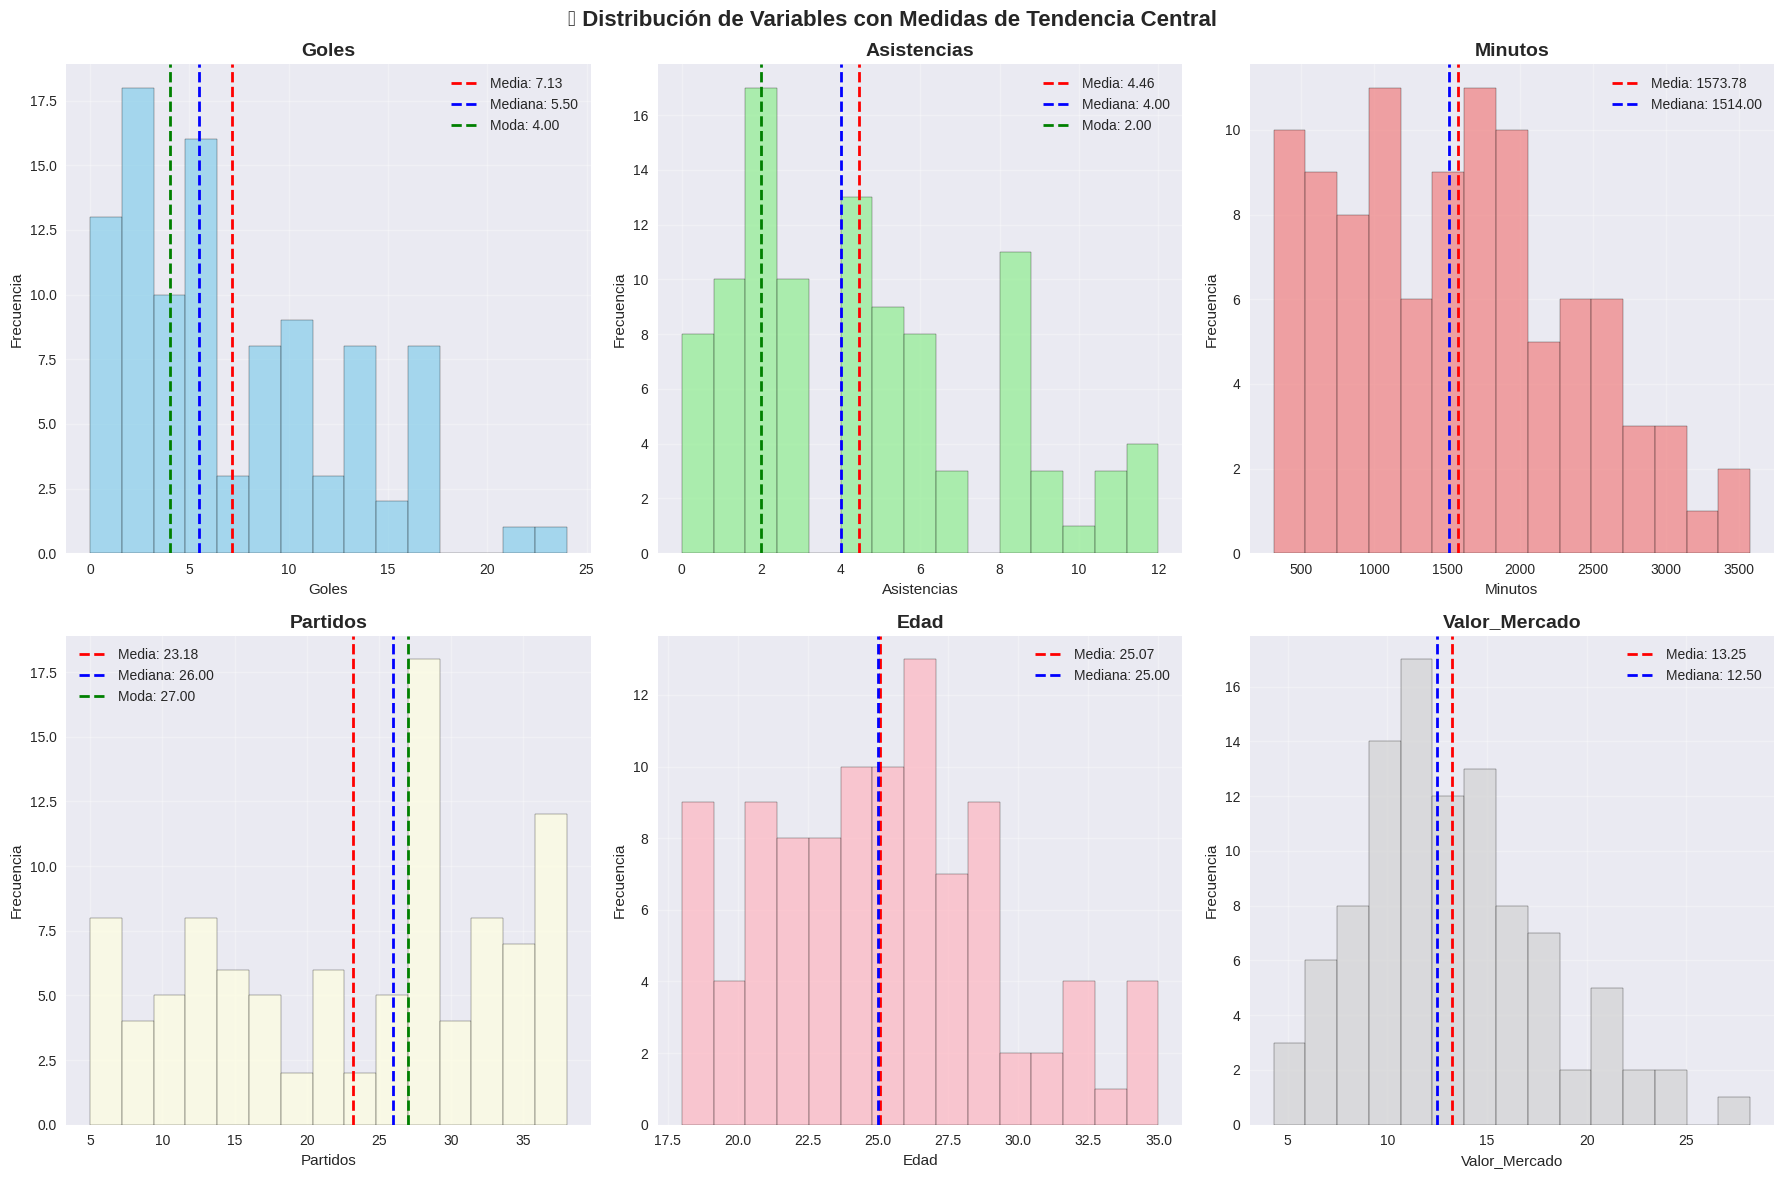


📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES

Goles:
  Media: 7.13
  Mediana: 5.50
  Diferencia: 1.63
  Distribución: Sesgada a la derecha ➡️

Asistencias:
  Media: 4.46
  Mediana: 4.00
  Diferencia: 0.46
  Distribución: Simétrica ⚖️

Minutos:
  Media: 1573.78
  Mediana: 1514.00
  Diferencia: 59.78
  Distribución: Sesgada a la derecha ➡️

Partidos:
  Media: 23.18
  Mediana: 26.00
  Diferencia: 2.82
  Distribución: Sesgada a la izquierda ⬅️

Edad:
  Media: 25.07
  Mediana: 25.00
  Diferencia: 0.07
  Distribución: Simétrica ⚖️

Valor_Mercado:
  Media: 13.25
  Mediana: 12.50
  Diferencia: 0.75
  Distribución: Sesgada a la derecha ➡️


In [14]:
# Crear visualizaciones de medidas de tendencia central
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Distribución de Variables con Medidas de Tendencia Central', fontsize=16, fontweight='bold')

# Variables para visualizar
variables_viz = ['Goles', 'Asistencias', 'Minutos', 'Partidos', 'Edad', 'Valor_Mercado']
colores = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray']

for i, variable in enumerate(variables_viz):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Crear histograma
    data = df_jugadores[variable]
    ax.hist(data, bins=15, color=colores[i], alpha=0.7, edgecolor='black')
    
    # Calcular medidas
    media = data.mean()
    mediana = data.median()
    moda = data.mode()
    
    # Añadir líneas verticales para las medidas
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    
    # Añadir moda solo si existe y es única
    if len(moda) == 1:
        ax.axvline(moda.iloc[0], color='green', linestyle='--', linewidth=2, label=f'Moda: {moda.iloc[0]:.2f}')
    
    # Configurar el gráfico
    ax.set_title(f'{variable}', fontsize=14, fontweight='bold')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de distribución
print("\n📊 ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES")
print("=" * 50)

for variable in variables_viz:
    data = df_jugadores[variable]
    media = data.mean()
    mediana = data.median()
    
    print(f"\n{variable}:")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Diferencia: {abs(media - mediana):.2f}")
    
    if abs(media - mediana) < 0.5:
        distribucion = "Simétrica ⚖️"
    elif media > mediana:
        distribucion = "Sesgada a la derecha ➡️"
    else:
        distribucion = "Sesgada a la izquierda ⬅️"
    
    print(f"  Distribución: {distribucion}")

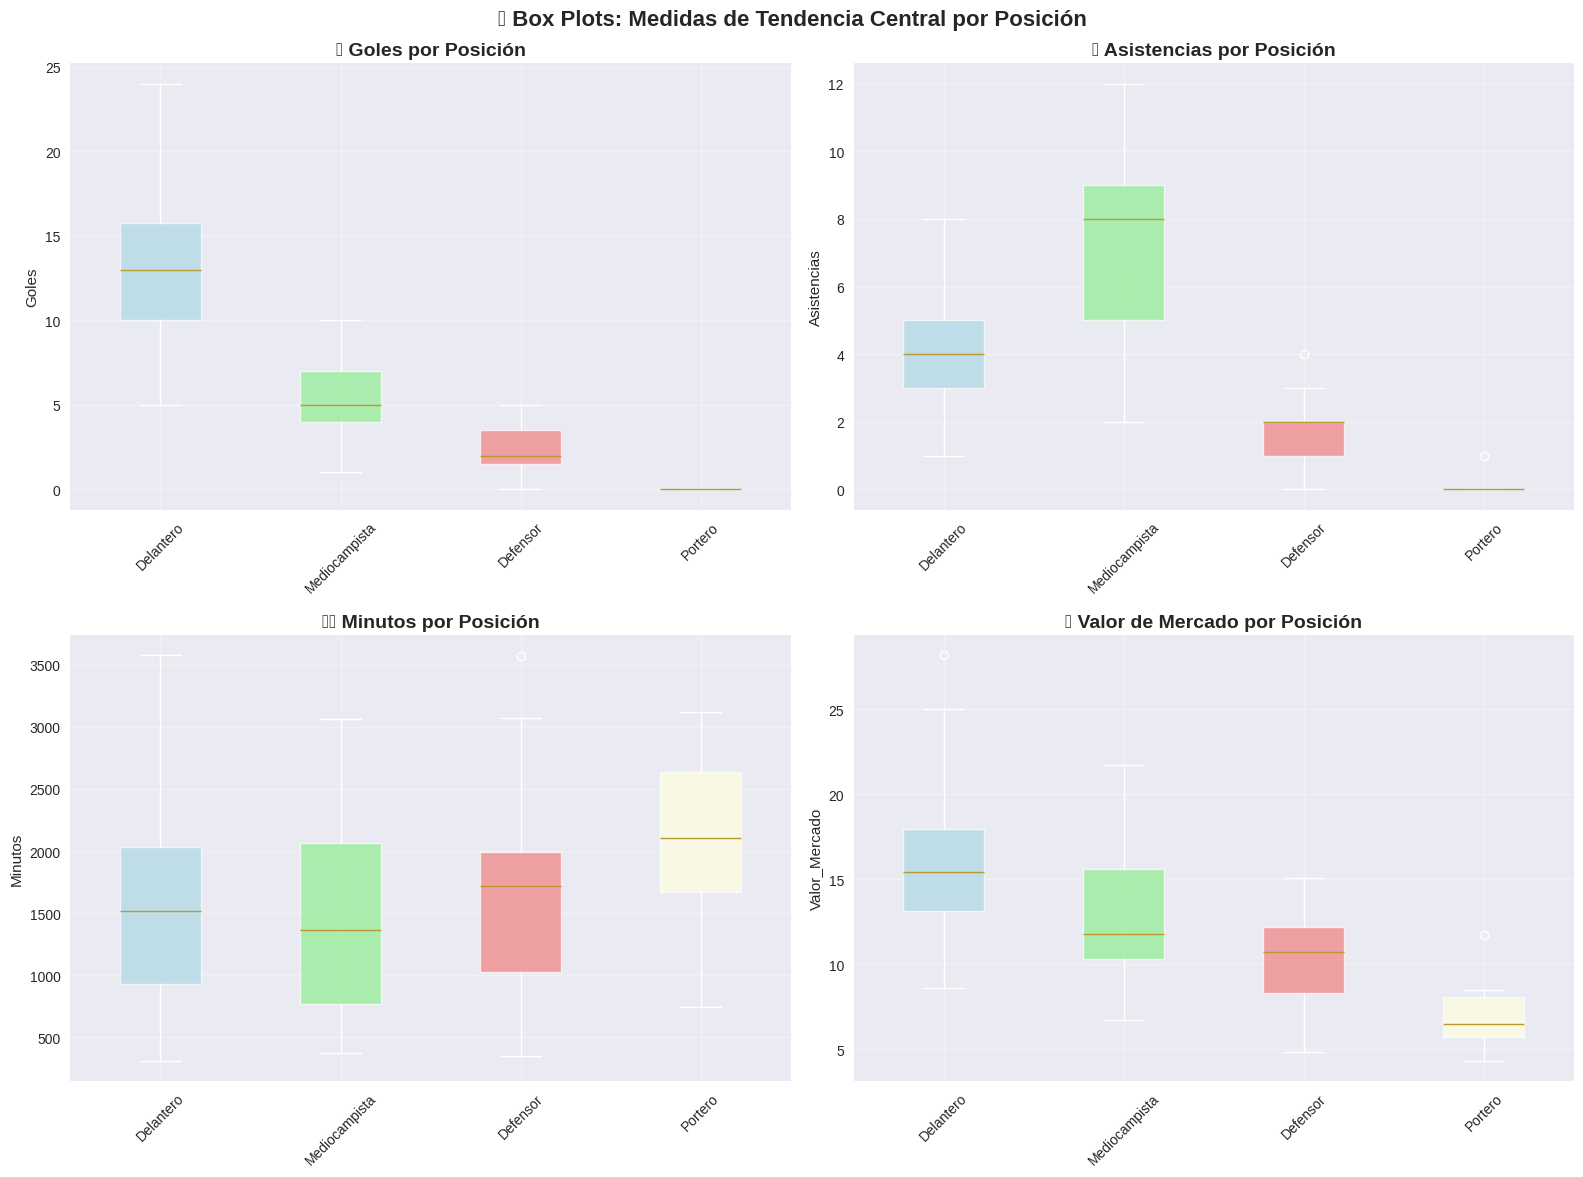


📊 COMPARACIÓN DE MEDIAS ENTRE POSICIONES

Goles:
  🥇 Delantero: 12.66
  🥈 Mediocampista: 5.27
  🥉 Defensor: 2.52
  4️⃣ Portero: 0.00
  📏 Diferencia máx-mín: 12.66
  📊 Coeficiente de variación: 107.01%

Asistencias:
  🥇 Mediocampista: 7.67
  🥈 Delantero: 4.08
  🥉 Defensor: 1.61
  4️⃣ Portero: 0.17
  📏 Diferencia máx-mín: 7.50
  📊 Coeficiente de variación: 97.11%

Minutos:
  🥇 Portero: 2069.50
  🥈 Defensor: 1660.48
  🥉 Delantero: 1571.82
  4️⃣ Mediocampista: 1425.48
  📏 Diferencia máx-mín: 644.02
  📊 Coeficiente de variación: 16.41%

Valor_Mercado:
  🥇 Delantero: 16.12
  🥈 Mediocampista: 12.85
  🥉 Defensor: 10.65
  4️⃣ Portero: 7.17
  📏 Diferencia máx-mín: 8.95
  📊 Coeficiente de variación: 32.18%


In [15]:
# Crear box plots para análisis por posición
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📦 Box Plots: Medidas de Tendencia Central por Posición', fontsize=16, fontweight='bold')

# Variables principales para box plots
variables_box = ['Goles', 'Asistencias', 'Minutos', 'Valor_Mercado']
titulos = ['⚽ Goles por Posición', '🎯 Asistencias por Posición', 
           '⏱️ Minutos por Posición', '💰 Valor de Mercado por Posición']

for i, (variable, titulo) in enumerate(zip(variables_box, titulos)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Crear box plot
    box_data = [df_jugadores[df_jugadores['Posicion'] == pos][variable] for pos in posiciones]
    
    bp = ax.boxplot(box_data, labels=posiciones, patch_artist=True)
    
    # Colorear las cajas
    colores_box = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colores_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Configurar el gráfico
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_ylabel(variable)
    ax.grid(True, alpha=0.3)
    
    # Rotar etiquetas si es necesario
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Comparación de medias entre posiciones
print("\n📊 COMPARACIÓN DE MEDIAS ENTRE POSICIONES")
print("=" * 50)

for variable in variables_box:
    print(f"\n{variable}:")
    medias_por_posicion = df_jugadores.groupby('Posicion')[variable].mean().sort_values(ascending=False)
    
    for i, (posicion, media) in enumerate(medias_por_posicion.items()):
        emoji = ["🥇", "🥈", "🥉", "4️⃣"][i] if i < 4 else str(i+1)
        print(f"  {emoji} {posicion}: {media:.2f}")
    
    # Encontrar la diferencia entre el máximo y mínimo
    diferencia = medias_por_posicion.max() - medias_por_posicion.min()
    print(f"  📏 Diferencia máx-mín: {diferencia:.2f}")
    
    # Coeficiente de variación entre posiciones
    cv = (medias_por_posicion.std() / medias_por_posicion.mean()) * 100
    print(f"  📊 Coeficiente de variación: {cv:.2f}%")